In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
df=pd.read_csv(r'C:\Users\sk\Downloads\Global Terrorism - START data\globalterrorismdb_0718dist.csv')
df

c:\users\sk\appdata\local\programs\python\python39\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181686,201712310022,2017,12,31,NaN,0,NaN,182,Somalia,11,...,NaN,"""Somalia: Al-Shabaab Militants Attack Army Che...","""Highlights: Somalia Daily Media Highlights 2 ...","""Highlights: Somalia Daily Media Highlights 1 ...",START Primary Collection,0,0,0,0,NaN
181687,201712310029,2017,12,31,NaN,0,NaN,200,Syria,10,...,NaN,"""Putin's 'victory' in Syria has turned into a ...","""Two Russian soldiers killed at Hmeymim base i...","""Two Russian servicemen killed in Syria mortar...",START Primary Collection,-9,-9,1,1,NaN
181688,201712310030,2017,12,31,NaN,0,NaN,160,Philippines,5,...,NaN,"""Maguindanao clashes trap tribe members,"" Phil...",NaN,NaN,START Primary Collection,0,0,0,0,NaN
181689,201712310031,2017,12,31,NaN,0,NaN,92,India,6,...,NaN,"""Trader escapes grenade attack in Imphal,"" Bus...",NaN,NaN,START Primary Collection,-9,-9,0,-9,NaN


In [20]:
df.shape

(181691, 135)

In [21]:
df.isnull().sum()

eventid            0
iyear              0
imonth             0
iday               0
approxdate    172452
               ...  
INT_LOG            0
INT_IDEO           0
INT_MISC           0
INT_ANY            0
related       156653
Length: 135, dtype: int64

In [22]:
def make_dataframe_for_nan(df):
    nan_features=[]
    nan_rows_feature=[]
    perc_nan_rows=[]
    rounded_perc_nan_rows=[]
    for feature in df.columns:
        if (df[feature].isnull().sum())>0:
            nan_rows=df[feature].isnull().sum()
            nan_rows_per=nan_rows/len(df)*100
            rounded_nan_rows_per=np.round(nan_rows_per)
            nan_features.append(feature)
            nan_rows_feature.append(nan_rows)
            perc_nan_rows.append(nan_rows_per)
            rounded_perc_nan_rows.append(rounded_nan_rows_per)
    nan= pd.DataFrame(list(zip(nan_features,nan_rows_feature,perc_nan_rows,rounded_perc_nan_rows)),columns =['feature Name','no of nan rows','percentage of nan rows','rounded percentage of nan rows'])
    nan.index = nan.index + 1
    return nan 

In [23]:
nan_dataframe=make_dataframe_for_nan(df)
nan_dataframe

,feature Name,no of nan rows,percentage of nan rows,rounded percentage of nan rows
1,approxdate,172452,94.914993,95.0
2,resolution,179471,98.778145,99.0
3,provstate,421,0.231712,0.0
4,city,434,0.238867,0.0
5,latitude,4556,2.507554,3.0
...,...,...,...,...
102,addnotes,153402,84.430159,84.0
103,scite1,66191,36.430533,36.0
104,scite2,104758,57.657231,58.0
105,scite3,138175,76.049447,76.0


In [42]:
high_nan_features=[]
for feature in df.columns:
    nan_rows=df[feature].isnull().sum()
    nan_rows_per=nan_rows/len(df)*100
    if nan_rows_per>=50:
        high_nan_features.append(feature)
high_nan_features

[]

In [43]:
len(high_nan_features)

0

In [44]:
df=df.drop(high_nan_features,axis=1)
df.shape

(181691, 58)

In [45]:
quant_features=[feature for feature in df.columns if df[feature].dtype!='O' and len(df[feature].unique())>20 ]
quant_features

['eventid',
 'iyear',
 'iday',
 'country',
 'latitude',
 'longitude',
 'targtype1',
 'targsubtype1',
 'natlty1',
 'nperps',
 'nperpcap',
 'weapsubtype1',
 'nkill',
 'nkillus',
 'nkillter',
 'nwound',
 'nwoundus',
 'nwoundte']

In [46]:
len(quant_features)

18

In [47]:
qual_features=[feature for feature in df.columns if len(df[feature].unique())<20]
qual_features

['imonth',
 'extended',
 'region',
 'region_txt',
 'specificity',
 'vicinity',
 'crit1',
 'crit2',
 'crit3',
 'doubtterr',
 'multiple',
 'success',
 'suicide',
 'attacktype1',
 'attacktype1_txt',
 'guncertain1',
 'individual',
 'claimed',
 'weaptype1',
 'weaptype1_txt',
 'property',
 'ishostkid',
 'INT_LOG',
 'INT_IDEO',
 'INT_MISC',
 'INT_ANY']

In [48]:
len(qual_features)

26

In [49]:
other_features=[feature for feature in df.columns if feature not in qual_features and feature not in quant_features]
other_features

['country_txt',
 'provstate',
 'city',
 'summary',
 'targtype1_txt',
 'targsubtype1_txt',
 'corp1',
 'target1',
 'natlty1_txt',
 'gname',
 'weapsubtype1_txt',
 'weapdetail',
 'scite1',
 'dbsource']

In [76]:
for feature in other_features:
    print(feature,'::')
    print(df[feature].unique())

country_txt ::
['Dominican Republic' 'Mexico' 'Philippines' 'Greece' 'Japan'
 'United States' 'Uruguay' 'Italy' 'East Germany (GDR)' 'Ethiopia'
 'Guatemala' 'Venezuela' 'West Germany (FRG)' 'Switzerland' 'Jordan'
 'Spain' 'Brazil' 'Egypt' 'Argentina' 'Lebanon' 'Ireland' 'Turkey'
 'Paraguay' 'Iran' 'United Kingdom' 'Colombia' 'Bolivia' 'Nicaragua'
 'Netherlands' 'Belgium' 'Canada' 'Australia' 'Pakistan' 'Zambia' 'Sweden'
 'Costa Rica' 'South Yemen' 'Cambodia' 'Israel' 'Poland' 'Taiwan' 'Panama'
 'Kuwait' 'West Bank and Gaza Strip' 'Austria' 'Czechoslovakia' 'India'
 'France' 'South Vietnam' 'Brunei' 'Zaire'
 "People's Republic of the Congo" 'Portugal' 'Algeria' 'El Salvador'
 'Thailand' 'Haiti' 'Sudan' 'Morocco' 'Cyprus' 'Myanmar' 'Afghanistan'
 'Peru' 'Chile' 'Honduras' 'Yugoslavia' 'Ecuador' 'New Zealand' 'Malaysia'
 'Singapore' 'Botswana' 'Jamaica' 'Chad' 'North Yemen' 'Andorra' 'Syria'
 'South Korea' 'United Arab Emirates' 'South Africa' 'Kenya' 'Iraq'
 'Somalia' 'Tanzania' 'Sri Lan

In [50]:
len(other_features)

14

In [51]:
num_features=[feature for feature in df.columns if df[feature].dtype!='O']
num_features

['eventid',
 'iyear',
 'imonth',
 'iday',
 'extended',
 'country',
 'region',
 'latitude',
 'longitude',
 'specificity',
 'vicinity',
 'crit1',
 'crit2',
 'crit3',
 'doubtterr',
 'multiple',
 'success',
 'suicide',
 'attacktype1',
 'targtype1',
 'targsubtype1',
 'natlty1',
 'guncertain1',
 'individual',
 'nperps',
 'nperpcap',
 'claimed',
 'weaptype1',
 'weapsubtype1',
 'nkill',
 'nkillus',
 'nkillter',
 'nwound',
 'nwoundus',
 'nwoundte',
 'property',
 'ishostkid',
 'INT_LOG',
 'INT_IDEO',
 'INT_MISC',
 'INT_ANY']

In [52]:
len(num_features)

41

In [53]:
non_num_features=[feature for feature in df.columns if df[feature].dtype=='O']
non_num_features

['country_txt',
 'region_txt',
 'provstate',
 'city',
 'summary',
 'attacktype1_txt',
 'targtype1_txt',
 'targsubtype1_txt',
 'corp1',
 'target1',
 'natlty1_txt',
 'gname',
 'weaptype1_txt',
 'weapsubtype1_txt',
 'weapdetail',
 'scite1',
 'dbsource']

In [36]:
len(non_num_features)

17

In [37]:
for feature in qual_features:
    print(feature)
    print(df[feature].unique())

imonth
[ 7  0  1  2  3  4  5  6  8  9 10 11 12]
extended
[0 1]
region
[ 2  1  5  8  4  3  9 11 10 12  6  7]
region_txt
['Central America & Caribbean' 'North America' 'Southeast Asia'
 'Western Europe' 'East Asia' 'South America' 'Eastern Europe'
 'Sub-Saharan Africa' 'Middle East & North Africa' 'Australasia & Oceania'
 'South Asia' 'Central Asia']
specificity
[ 1.  4.  5.  2.  3. nan]
vicinity
[ 0  1 -9]
crit1
[1 0]
crit2
[1 0]
crit3
[1 0]
doubtterr
[ 0. -9.  1. nan]
multiple
[ 0.  1. nan]
success
[1 0]
suicide
[0 1]
attacktype1
[1 6 3 7 2 4 9 8 5]
attacktype1_txt
['Assassination' 'Hostage Taking (Kidnapping)' 'Bombing/Explosion'
 'Facility/Infrastructure Attack' 'Armed Assault' 'Hijacking' 'Unknown'
 'Unarmed Assault' 'Hostage Taking (Barricade Incident)']
guncertain1
[ 0.  1. nan]
individual
[0 1]
claimed
[nan  0.  1. -9.]
weaptype1
[13  6  8  5  2  9 11 10  7  3 12  1]
weaptype1_txt
['Unknown' 'Explosives' 'Incendiary' 'Firearms' 'Chemical' 'Melee'
 'Sabotage Equipment'
 'Vehicle (

In [57]:
regions=df['region_txt'].unique()
regions

array(['Central America & Caribbean', 'North America', 'Southeast Asia',
       'Western Europe', 'East Asia', 'South America', 'Eastern Europe',
       'Sub-Saharan Africa', 'Middle East & North Africa',
       'Australasia & Oceania', 'South Asia', 'Central Asia'],
      dtype=object)

In [58]:
len(regions)

12

In [61]:
regions_ncases=df['region_txt'].value_counts()
regions_ncases

Middle East & North Africa     50474
South Asia                     44974
South America                  18978
Sub-Saharan Africa             17550
Western Europe                 16639
Southeast Asia                 12485
Central America & Caribbean    10344
Eastern Europe                  5144
North America                   3456
East Asia                        802
Central Asia                     563
Australasia & Oceania            282
Name: region_txt, dtype: int64

<AxesSubplot:>

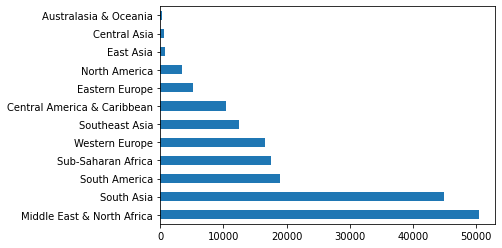

In [62]:
regions_ncases.plot(kind='barh')

In [71]:
Middle_east_SA_cases=df.groupby('region_txt').get_group('Middle East & North Africa')['country_txt'].value_counts()
Middle_east_SA_cases

Iraq                        24636
Turkey                       4292
Yemen                        3347
Algeria                      2743
Egypt                        2479
Lebanon                      2478
Libya                        2249
West Bank and Gaza Strip     2227
Syria                        2201
Israel                       2183
Iran                          684
Saudi Arabia                  371
Bahrain                       207
Jordan                        113
Tunisia                       109
Kuwait                         76
Morocco                        36
United Arab Emirates           22
Qatar                           7
North Yemen                     6
Western Sahara                  5
South Yemen                     2
International                   1
Name: country_txt, dtype: int64

In [72]:
Sounth_Asia_cases=df.groupby('region_txt').get_group('South Asia')['country_txt'].value_counts()
Sounth_Asia_cases

Pakistan       14368
Afghanistan    12731
India          11960
Sri Lanka       3022
Bangladesh      1648
Nepal           1215
Maldives          22
Bhutan             6
Mauritius          2
Name: country_txt, dtype: int64

In [74]:
Western_Europe_cases=df.groupby('region_txt').get_group('Western Europe')['country_txt'].value_counts()
Western_Europe_cases

United Kingdom        5235
Spain                 3249
France                2693
Italy                 1565
Greece                1275
Germany                735
West Germany (FRG)     541
Ireland                307
Belgium                154
Portugal               140
Sweden                 132
Cyprus                 132
Netherlands            130
Austria                115
Switzerland            111
Denmark                 41
Malta                   23
Finland                 20
Norway                  19
Luxembourg              16
Iceland                  4
Vatican City             1
Andorra                  1
Name: country_txt, dtype: int64

In [77]:
countries=df['country_txt'].unique()
countries

array(['Dominican Republic', 'Mexico', 'Philippines', 'Greece', 'Japan',
       'United States', 'Uruguay', 'Italy', 'East Germany (GDR)',
       'Ethiopia', 'Guatemala', 'Venezuela', 'West Germany (FRG)',
       'Switzerland', 'Jordan', 'Spain', 'Brazil', 'Egypt', 'Argentina',
       'Lebanon', 'Ireland', 'Turkey', 'Paraguay', 'Iran',
       'United Kingdom', 'Colombia', 'Bolivia', 'Nicaragua',
       'Netherlands', 'Belgium', 'Canada', 'Australia', 'Pakistan',
       'Zambia', 'Sweden', 'Costa Rica', 'South Yemen', 'Cambodia',
       'Israel', 'Poland', 'Taiwan', 'Panama', 'Kuwait',
       'West Bank and Gaza Strip', 'Austria', 'Czechoslovakia', 'India',
       'France', 'South Vietnam', 'Brunei', 'Zaire',
       "People's Republic of the Congo", 'Portugal', 'Algeria',
       'El Salvador', 'Thailand', 'Haiti', 'Sudan', 'Morocco', 'Cyprus',
       'Myanmar', 'Afghanistan', 'Peru', 'Chile', 'Honduras',
       'Yugoslavia', 'Ecuador', 'New Zealand', 'Malaysia', 'Singapore',
       'Bot

In [79]:
len(countries)

205

In [80]:
countries_cases=df['country_txt'].value_counts()
countries_cases

Iraq                 24636
Pakistan             14368
Afghanistan          12731
India                11960
Colombia              8306
                     ...  
Vatican City             1
North Korea              1
Andorra                  1
International            1
Wallis and Futuna        1
Name: country_txt, Length: 205, dtype: int64

In [183]:
countries_cases[:20]

Iraq              24636
Pakistan          14368
Afghanistan       12731
India             11960
Colombia           8306
Philippines        6908
Peru               6096
El Salvador        5320
United Kingdom     5235
Turkey             4292
Somalia            4142
Nigeria            3907
Thailand           3849
Yemen              3347
Spain              3249
Sri Lanka          3022
United States      2836
Algeria            2743
France             2693
Egypt              2479
Name: country_txt, dtype: int64

In [185]:
df.groupby('iyear').get_group(2017)['country_txt'].value_counts()[:20]

Iraq                                2466
Afghanistan                         1414
India                                966
Pakistan                             719
Philippines                          692
Somalia                              614
Nigeria                              484
Nepal                                247
Syria                                243
Yemen                                226
Egypt                                224
Libya                                190
Turkey                               181
Thailand                             179
Democratic Republic of the Congo     143
Mali                                 141
United Kingdom                       122
Colombia                             117
Myanmar                              115
Sudan                                106
Name: country_txt, dtype: int64

In [186]:
df.groupby('iyear').get_group(2017)['city'].value_counts()[:20]

Mosul               479
Baghdad             378
Unknown             364
Mogadishu           219
Arish               106
Kabul                94
Maiduguri            66
Quetta               51
Benghazi             49
Karachi              42
Kirkuk               37
Hawijah district     34
Imphal               34
Abu Ghraib           33
Nahrawan             32
Belfast              31
Radhwaniyah          31
Athens               31
Jalalabad            30
Qarah Tapah          30
Name: city, dtype: int64

In [83]:
Iraq_prov_cases=df.groupby('country_txt').get_group('Iraq')['provstate'].value_counts()
Iraq_prov_cases

Baghdad         7644
Saladin         3411
Al Anbar        3299
Nineveh         3241
Diyala          3041
Kirkuk          1669
Babil           1110
Basra            266
Unknown          148
Karbala          142
At Tamim         125
Wasit            121
Arbil             99
Dhi Qar           66
Sulaymaniyah      60
Najaf             53
Maysan            31
Al Qadisiyah      30
Dihok             29
Qadisiyah         27
Muthanna          20
Kunar              1
Khost              1
unknown            1
NIneveh            1
Name: provstate, dtype: int64

In [85]:
Iraq_city_cases=Iraq_prov_cases=df.groupby('country_txt').get_group('Iraq')['city'].value_counts()
Iraq_city_cases[:10]

Baghdad         7585
Mosul           2265
Kirkuk           925
Baqubah          745
Fallujah         579
Unknown          562
Ramadi           509
Tikrit           418
Abu Ghraib       324
Tuz Khormato     277
Name: city, dtype: int64

In [96]:
Iraq_year_cases=df.groupby('country_txt').get_group('Iraq')['iyear'].value_counts()
Iraq_year_cases

2014    3933
2016    3360
2013    2852
2015    2751
2017    2466
2012    1437
2011    1308
2010    1179
2009    1137
2008    1106
2007    1047
2006     838
2005     617
2004     323
2003     102
1992      35
1997      21
1994      18
1995      17
1996      12
1999      12
2000      10
1998       7
2002       6
1980       6
1982       5
1989       4
1988       4
1987       3
1981       3
1976       3
1991       3
2001       3
1983       3
1979       2
1984       2
1975       1
Name: iyear, dtype: int64

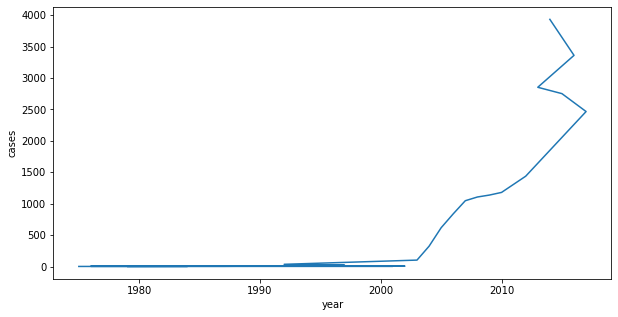

In [104]:
plt.figure(figsize=(10,5))
Iraq_year_cases.plot()
# plt.title('growth in sales')
plt.xlabel('year')
plt.ylabel('cases')
plt.show()

In [105]:
# plt.plot(Iraq_year_cases.keys(),Iraq_year_cases)
# plt.title('growth in sales')
# plt.xlabel('money')
# plt.ylabel('time')
# plt.show()

In [90]:
df['iyear'].max()

2017

In [91]:
df['iyear'].min()

1970

In [134]:
Iraq_2017_cases_total=Iraq_year_cases.loc[2017]
Iraq_2017_cases_total

2466

In [121]:
Iraq_monthwise_cases_2017=df.groupby('country_txt').get_group('Iraq')[df['iyear']==2017]['imonth'].value_counts()
Iraq_monthwise_cases_2017

<ipython-input-121-7475e0a7686f>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  Iraq_monthwise_cases_2017=df.groupby('country_txt').get_group('Iraq')[df['iyear']==2017]['imonth'].value_counts()


6     285
2     258
5     255
3     221
7     212
8     206
4     197
1     197
9     182
10    158
11    158
12    137
Name: imonth, dtype: int64

<AxesSubplot:>

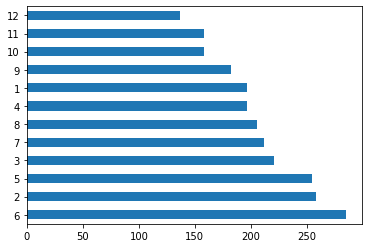

In [122]:
Iraq_monthwise_cases_2017.plot(kind='barh')

In [123]:
Iraq_monthwise_cases_2017.mean()

205.5

In [137]:
Iraq_2017_cases_total/365

6.756164383561644

In [138]:
Iraq_daywise_cases_june_2017=df.groupby('country_txt').get_group('Iraq')[df['iyear']==2017][df['imonth']==6]['iday'].value_counts()
Iraq_daywise_cases_june_2017

<ipython-input-138-797b4985e605>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  Iraq_daywise_cases_june_2017=df.groupby('country_txt').get_group('Iraq')[df['iyear']==2017][df['imonth']==6]['iday'].value_counts()
<ipython-input-138-797b4985e605>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  Iraq_daywise_cases_june_2017=df.groupby('country_txt').get_group('Iraq')[df['iyear']==2017][df['imonth']==6]['iday'].value_counts()


10    24
14    17
28    16
3     15
18    15
23    13
1     11
5     11
6     11
26    11
15    11
25    10
16    10
9     10
8     10
2      9
13     8
24     8
30     8
20     7
21     7
7      7
12     6
19     6
29     6
22     6
27     4
11     3
4      3
17     2
Name: iday, dtype: int64

<AxesSubplot:>

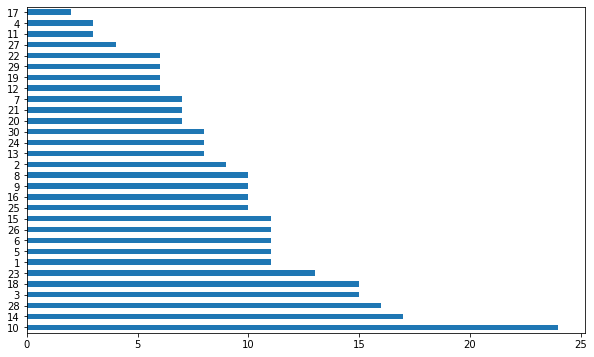

In [141]:
plt.figure(figsize=(10,6))
Iraq_daywise_cases_june_2017.plot(kind='barh')

In [143]:
df.groupby('country_txt').get_group('Iraq')[df['iyear']==2017][df['imonth']==6][df['iday']==10]['city'].value_counts()

<ipython-input-143-e9692159590c>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df.groupby('country_txt').get_group('Iraq')[df['iyear']==2017][df['imonth']==6][df['iday']==10]['city'].value_counts()
<ipython-input-143-e9692159590c>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df.groupby('country_txt').get_group('Iraq')[df['iyear']==2017][df['imonth']==6][df['iday']==10]['city'].value_counts()
<ipython-input-143-e9692159590c>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df.groupby('country_txt').get_group('Iraq')[df['iyear']==2017][df['imonth']==6][df['iday']==10]['city'].value_counts()


Mosul               18
Baghdad              1
Kifri district       1
Anaz                 1
Shirqat district     1
Baiji district       1
Hawr Rajab           1
Name: city, dtype: int64

In [149]:
Iraq_citywise_cases_2017=df.groupby('country_txt').get_group('Iraq')[df['iyear']==2017]['city'].value_counts()
Iraq_citywise_cases_2017[:20]

<ipython-input-149-b839fc294ae3>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  Iraq_citywise_cases_2017=df.groupby('country_txt').get_group('Iraq')[df['iyear']==2017]['city'].value_counts()


Mosul               479
Baghdad             376
Unknown              67
Kirkuk               37
Hawijah district     34
Abu Ghraib           33
Nahrawan             32
Radhwaniyah          31
Qarah Tapah          30
Taji                 29
Madain               28
Tarmiyah             27
Ramadi               26
Tal Afar             25
Basra                21
Tikrit               19
Baqubah              19
Al-Halabisah         19
Yusufiyah            17
Fallujah             15
Name: city, dtype: int64

<AxesSubplot:>

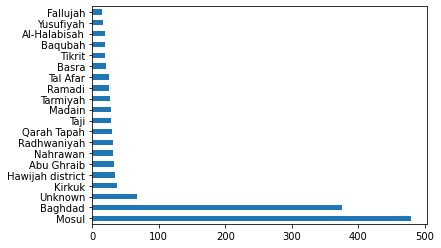

In [152]:
# plt.figure(figsize=(6,10))
Iraq_citywise_cases_2017[:20].plot(kind='barh')

In [155]:
attacktype1_Iraq_cases_2017=df.groupby('country_txt').get_group('Iraq')[df['iyear']==2017]['attacktype1_txt'].value_counts()
attacktype1_Iraq_cases_2017

<ipython-input-155-1feb50a5b298>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  attacktype1_Iraq_cases_2017=df.groupby('country_txt').get_group('Iraq')[df['iyear']==2017]['attacktype1_txt'].value_counts()


Bombing/Explosion                      1866
Unknown                                 220
Armed Assault                           187
Hostage Taking (Kidnapping)             115
Assassination                            50
Facility/Infrastructure Attack           22
Hijacking                                 2
Unarmed Assault                           2
Hostage Taking (Barricade Incident)       2
Name: attacktype1_txt, dtype: int64

In [156]:
df.groupby('country_txt').get_group('Iraq')[df['iyear']==2017]['targtype1_txt'].value_counts()

<ipython-input-156-b4f116a7b6c5>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df.groupby('country_txt').get_group('Iraq')[df['iyear']==2017]['targtype1_txt'].value_counts()


Private Citizens & Property       894
Military                          553
Unknown                           441
Business                          214
Police                            177
Government (General)               70
Utilities                          32
Terrorists/Non-State Militia       23
Religious Figures/Institutions     16
Educational Institution            14
Journalists & Media                12
Transportation                      9
Violent Political Party             7
NGO                                 1
Other                               1
Telecommunication                   1
Airports & Aircraft                 1
Name: targtype1_txt, dtype: int64

In [157]:
df.groupby('country_txt').get_group('Iraq')[df['iyear']==2017]['targtype1_txt'].value_counts()

<ipython-input-157-b4f116a7b6c5>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df.groupby('country_txt').get_group('Iraq')[df['iyear']==2017]['targtype1_txt'].value_counts()


Private Citizens & Property       894
Military                          553
Unknown                           441
Business                          214
Police                            177
Government (General)               70
Utilities                          32
Terrorists/Non-State Militia       23
Religious Figures/Institutions     16
Educational Institution            14
Journalists & Media                12
Transportation                      9
Violent Political Party             7
NGO                                 1
Other                               1
Telecommunication                   1
Airports & Aircraft                 1
Name: targtype1_txt, dtype: int64

In [158]:
df.groupby('country_txt').get_group('Iraq')[df['iyear']==2017]['weaptype1_txt'].value_counts()

<ipython-input-158-3c2708310aaf>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df.groupby('country_txt').get_group('Iraq')[df['iyear']==2017]['weaptype1_txt'].value_counts()


Explosives                                                                     1882
Unknown                                                                         287
Firearms                                                                        246
Incendiary                                                                       23
Chemical                                                                         17
Melee                                                                             9
Vehicle (not to include vehicle-borne explosives, i.e., car or truck bombs)       1
Sabotage Equipment                                                                1
Name: weaptype1_txt, dtype: int64

In [162]:
df.groupby('country_txt').get_group('Iraq')[df['iyear']==2017]['nkill'].value_counts()

<ipython-input-162-e22c8ba2f200>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df.groupby('country_txt').get_group('Iraq')[df['iyear']==2017]['nkill'].value_counts()


0.0      1073
1.0       556
2.0       193
3.0       115
4.0        85
5.0        64
7.0        30
6.0        25
10.0       24
8.0        21
12.0       17
9.0        16
17.0       14
11.0       12
13.0       10
16.0        7
20.0        7
15.0        6
36.0        5
14.0        4
23.0        4
30.0        3
28.0        3
18.0        3
35.0        2
26.0        2
37.0        2
41.0        2
24.0        2
25.0        2
27.0        2
32.0        2
45.0        2
34.0        2
40.0        1
75.0        1
100.0       1
19.0        1
44.0        1
46.0        1
29.0        1
163.0       1
49.0        1
200.0       1
230.0       1
151.0       1
93.0        1
39.0        1
21.0        1
64.0        1
Name: nkill, dtype: int64

In [169]:
df.groupby('country_txt').get_group('Iraq')[df['iyear']==2017]['nkill'].mean()

<ipython-input-169-ba1fb9f7effe>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df.groupby('country_txt').get_group('Iraq')[df['iyear']==2017]['nkill'].mean()


2.775825117873982

In [171]:
df.groupby('country_txt').get_group('Iraq')[df['iyear']==2017]['nkill'].sort_values(ascending=False)

<ipython-input-171-02a1bfad689e>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df.groupby('country_txt').get_group('Iraq')[df['iyear']==2017]['nkill'].sort_values(ascending=False)


173221    230.0
176624    200.0
175454    163.0
173425    151.0
176188    100.0
          ...  
181070      NaN
181147      NaN
181196      NaN
181244      NaN
181640      NaN
Name: nkill, Length: 2466, dtype: float64

In [175]:
len(df.groupby('country_txt').get_group('Iraq')[df['iyear']==2017][df['nkill']>=20])

<ipython-input-175-5725b7bfbf6c>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  len(df.groupby('country_txt').get_group('Iraq')[df['iyear']==2017][df['nkill']>=20])
<ipython-input-175-5725b7bfbf6c>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  len(df.groupby('country_txt').get_group('Iraq')[df['iyear']==2017][df['nkill']>=20])


57

In [176]:
df.groupby('country_txt').get_group('Iraq')[df['iyear']==2017][df['nkill']>=20]['city'].value_counts()

<ipython-input-176-cc7f314eeeaf>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df.groupby('country_txt').get_group('Iraq')[df['iyear']==2017][df['nkill']>=20]['city'].value_counts()
<ipython-input-176-cc7f314eeeaf>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df.groupby('country_txt').get_group('Iraq')[df['iyear']==2017][df['nkill']>=20]['city'].value_counts()


Mosul                    19
Baghdad                   3
Ramadi                    2
Waleed                    2
Hawijah                   2
Tal Afar                  2
Nasiriyah                 2
Hatra district            2
Unknown                   2
Tall Safouk               2
Shirqat                   1
Samarra                   1
As Sakran                 1
Ain al-Hassan             1
Musayyib                  1
Tuz Khormato              1
Rutbah                    1
Khubayrat                 1
Jurf al-Sakhar            1
Nukhayb                   1
Hajaf                     1
Tal Kasibah               1
Khanukah                  1
Vefa                      1
Akashat                   1
Rawah                     1
Bakhirah                  1
Tikrit                    1
Tuz Khormato district     1
Name: city, dtype: int64

In [180]:
df.groupby('country_txt').get_group('Iraq')[df['iyear']==2017]['nkill'].sum()

<ipython-input-180-bd23506991b2>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df.groupby('country_txt').get_group('Iraq')[df['iyear']==2017]['nkill'].sum()


6476.0

In [181]:
df.groupby('country_txt').get_group('Iraq')['nkill'].sum()

78589.0

In [187]:
df.groupby('country_txt').get_group('Pakistan')['provstate'].value_counts()

Balochistan                            3710
Sindh                                  3206
Khyber Pakhtunkhwa                     3084
Federally Administered Tribal Areas    2392
North-West Frontier Province            866
Punjab                                  829
Islamabad Capital Territory             154
Unknown                                  49
Gilgit-Baltistan                         47
Azad Kashmir                             30
SIndh                                     1
Name: provstate, dtype: int64

In [189]:
df.groupby('country_txt').get_group('Pakistan')['city'].value_counts()[:20]

Karachi             2651
Peshawar             819
Quetta               803
Lahore               233
Jamrud               160
Bara                 157
Dera Bugti           152
Islamabad            146
Landi Kotal          144
Bannu                144
Mohmand district     138
Unknown              131
Hangu                129
Dera Ismail Khan     124
Bajaur district      122
Sui                  116
Rawalpindi           111
Turbat               108
Miran Shah           108
Hyderabad            105
Name: city, dtype: int64

In [191]:
yearwise_cases_pakistan=df.groupby('country_txt').get_group('Pakistan')['iyear'].value_counts()
yearwise_cases_pakistan

2013    2215
2014    2151
2012    1654
2015    1243
2011    1012
2016     864
2017     719
2010     713
2009     667
1995     666
2008     568
2007     260
1997     206
1996     180
2006     164
1994     154
1991     150
1990      87
1992      85
2005      77
2004      67
1987      60
2001      53
2000      49
2002      46
1989      45
1988      44
1999      39
1998      37
2003      29
1986      24
1983       9
1979       7
1981       4
1982       4
1976       3
1984       3
1974       2
1975       2
1978       2
1985       2
1970       1
1980       1
Name: iyear, dtype: int64

<AxesSubplot:>

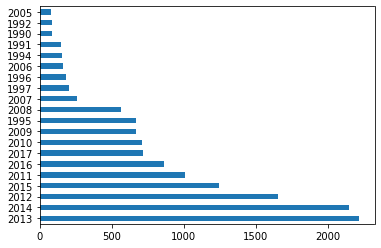

In [196]:
yearwise_cases_pakistan[:20].plot(kind='barh')

<AxesSubplot:>

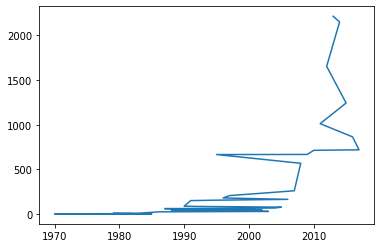

In [192]:
yearwise_cases_pakistan.plot()

In [199]:
df.groupby('country_txt').get_group('Pakistan')[df['iyear']==2017]['provstate'].value_counts()

<ipython-input-199-3cb9b339b022>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df.groupby('country_txt').get_group('Pakistan')[df['iyear']==2017]['provstate'].value_counts()


Balochistan                            325
Federally Administered Tribal Areas    168
Khyber Pakhtunkhwa                     118
Sindh                                   56
Punjab                                  38
Islamabad Capital Territory              7
Gilgit-Baltistan                         3
Azad Kashmir                             3
Unknown                                  1
Name: provstate, dtype: int64

In [198]:
df.groupby('country_txt').get_group('Pakistan')[df['iyear']==2017]['city'].value_counts()

<ipython-input-198-8d3ce5b72f14>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df.groupby('country_txt').get_group('Pakistan')[df['iyear']==2017]['city'].value_counts()


Quetta                 51
Karachi                42
Peshawar               21
Dera Bugti             14
Lahore                 14
                       ..
Swat district           1
Qayyum Abad Qandhro     1
Chugal Pura             1
Barwal                  1
Chakdara                1
Name: city, Length: 360, dtype: int64

In [200]:
df.groupby('country_txt').get_group('Pakistan')[df['iyear']==2017]['imonth'].value_counts()

<ipython-input-200-ee1c0ba584ce>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df.groupby('country_txt').get_group('Pakistan')[df['iyear']==2017]['imonth'].value_counts()


5     82
3     72
2     67
8     65
10    64
1     63
7     56
11    54
12    53
4     52
6     50
9     41
Name: imonth, dtype: int64

In [201]:
df.groupby('country_txt').get_group('Pakistan')[df['iyear']==2017][df['imonth']==6]['iday'].value_counts()

<ipython-input-201-645764baf8b8>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df.groupby('country_txt').get_group('Pakistan')[df['iyear']==2017][df['imonth']==6]['iday'].value_counts()
<ipython-input-201-645764baf8b8>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df.groupby('country_txt').get_group('Pakistan')[df['iyear']==2017][df['imonth']==6]['iday'].value_counts()


23    5
16    5
17    4
11    4
25    3
20    3
2     2
13    2
27    2
24    2
30    2
10    2
7     2
4     2
12    1
3     1
9     1
18    1
19    1
8     1
6     1
5     1
26    1
15    1
Name: iday, dtype: int64

In [203]:
df.groupby('country_txt').get_group('Pakistan')[df['iyear']==2017]['imonth'].mean()

<ipython-input-203-513b811fa136>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df.groupby('country_txt').get_group('Pakistan')[df['iyear']==2017]['imonth'].mean()


6.233657858136301

In [204]:
df.groupby('country_txt').get_group('Pakistan')[df['iyear']==2017]['attacktype1_txt'].value_counts()

<ipython-input-204-745ec4754306>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df.groupby('country_txt').get_group('Pakistan')[df['iyear']==2017]['attacktype1_txt'].value_counts()


Bombing/Explosion                      389
Armed Assault                          203
Assassination                           67
Hostage Taking (Kidnapping)             40
Unknown                                 12
Facility/Infrastructure Attack           4
Unarmed Assault                          2
Hostage Taking (Barricade Incident)      2
Name: attacktype1_txt, dtype: int64

In [205]:
df.groupby('country_txt').get_group('Pakistan')[df['iyear']==2017]['targtype1_txt'].value_counts()

<ipython-input-205-d050d05136f2>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df.groupby('country_txt').get_group('Pakistan')[df['iyear']==2017]['targtype1_txt'].value_counts()


Private Citizens & Property       160
Military                          157
Police                            102
Unknown                            89
Government (General)               50
Business                           30
Utilities                          23
Educational Institution            23
Transportation                     22
Journalists & Media                18
Religious Figures/Institutions     17
Terrorists/Non-State Militia       11
Telecommunication                   7
Violent Political Party             5
Government (Diplomatic)             2
Food or Water Supply                1
Other                               1
NGO                                 1
Name: targtype1_txt, dtype: int64

In [206]:
df.groupby('country_txt').get_group('Pakistan')[df['iyear']==2017]['nkill'].value_counts()

<ipython-input-206-2f02be872b1a>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df.groupby('country_txt').get_group('Pakistan')[df['iyear']==2017]['nkill'].value_counts()


0.0     399
1.0     142
2.0      62
3.0      34
4.0      25
6.0       8
8.0       6
5.0       6
7.0       3
16.0      3
10.0      2
14.0      2
12.0      2
20.0      1
27.0      1
26.0      1
24.0      1
25.0      1
29.0      1
9.0       1
91.0      1
39.0      1
40.0      1
11.0      1
Name: nkill, dtype: int64

In [207]:
len(df.groupby('country_txt').get_group('Pakistan')[df['iyear']==2017][df['nkill']>=20])

<ipython-input-207-b20c36862d4e>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  len(df.groupby('country_txt').get_group('Pakistan')[df['iyear']==2017][df['nkill']>=20])
<ipython-input-207-b20c36862d4e>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  len(df.groupby('country_txt').get_group('Pakistan')[df['iyear']==2017][df['nkill']>=20])


9

In [208]:
df.groupby('country_txt').get_group('Pakistan')[df['iyear']==2017][df['nkill']>=20]['city'].value_counts()

<ipython-input-208-f063bc619cb1>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df.groupby('country_txt').get_group('Pakistan')[df['iyear']==2017][df['nkill']>=20]['city'].value_counts()
<ipython-input-208-f063bc619cb1>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df.groupby('country_txt').get_group('Pakistan')[df['iyear']==2017][df['nkill']>=20]['city'].value_counts()


Parachinar         4
Mastung            1
Buleda             1
Sehwan             1
Fatehpur Sharif    1
Lahore             1
Name: city, dtype: int64

In [209]:
df.groupby('country_txt').get_group('Pakistan')[df['iyear']==2017]['nkill'].sum()

<ipython-input-209-cdecd1cffbc0>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df.groupby('country_txt').get_group('Pakistan')[df['iyear']==2017]['nkill'].sum()


1076.0

In [211]:
df.groupby('country_txt').get_group('Pakistan')['nkill'].sum()

23822.0

In [82]:
df.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'extended', 'country',
       'country_txt', 'region', 'region_txt', 'provstate', 'city', 'latitude',
       'longitude', 'specificity', 'vicinity', 'summary', 'crit1', 'crit2',
       'crit3', 'doubtterr', 'multiple', 'success', 'suicide', 'attacktype1',
       'attacktype1_txt', 'targtype1', 'targtype1_txt', 'targsubtype1',
       'targsubtype1_txt', 'corp1', 'target1', 'natlty1', 'natlty1_txt',
       'gname', 'guncertain1', 'individual', 'nperps', 'nperpcap', 'claimed',
       'weaptype1', 'weaptype1_txt', 'weapsubtype1', 'weapsubtype1_txt',
       'weapdetail', 'nkill', 'nkillus', 'nkillter', 'nwound', 'nwoundus',
       'nwoundte', 'property', 'ishostkid', 'scite1', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY'],
      dtype='object')

c:\users\sk\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


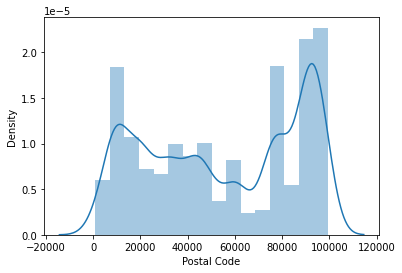

c:\users\sk\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


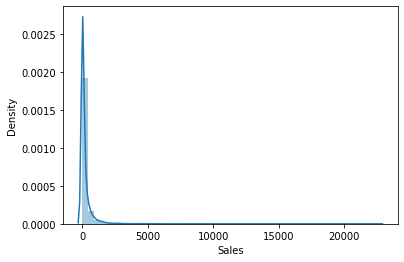

c:\users\sk\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


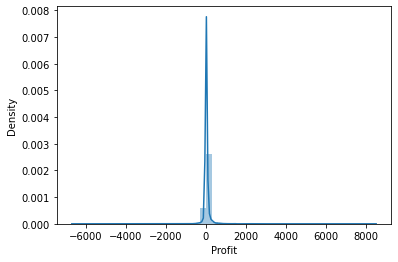

In [15]:
for feature in quant_features:
    sns.distplot(df[feature])
    plt.show()

In [62]:
df['Profit'].max()

8399.976

In [63]:
df['Profit'].min()

-6599.978

In [64]:
df['Profit'].mean()

28.65689630778467

In [65]:
df['Profit'].median()

8.6665

In [78]:
(df['Profit']>0).value_counts()

True     8058
False    1936
Name: Profit, dtype: int64

In [79]:
cities=df['City'].unique()
cities

array(['Henderson', 'Los Angeles', 'Fort Lauderdale', 'Concord',
       'Seattle', 'Fort Worth', 'Madison', 'West Jordan', 'San Francisco',
       'Fremont', 'Philadelphia', 'Orem', 'Houston', 'Richardson',
       'Naperville', 'Melbourne', 'Eagan', 'Westland', 'Dover',
       'New Albany', 'New York City', 'Troy', 'Chicago', 'Gilbert',
       'Springfield', 'Jackson', 'Memphis', 'Decatur', 'Durham',
       'Columbia', 'Rochester', 'Minneapolis', 'Portland', 'Saint Paul',
       'Aurora', 'Charlotte', 'Orland Park', 'Urbandale', 'Columbus',
       'Bristol', 'Wilmington', 'Bloomington', 'Phoenix', 'Roseville',
       'Independence', 'Pasadena', 'Newark', 'Franklin', 'Scottsdale',
       'San Jose', 'Edmond', 'Carlsbad', 'San Antonio', 'Monroe',
       'Fairfield', 'Grand Prairie', 'Redlands', 'Hamilton', 'Westfield',
       'Akron', 'Denver', 'Dallas', 'Whittier', 'Saginaw', 'Medina',
       'Dublin', 'Detroit', 'Tampa', 'Santa Clara', 'Lakeville',
       'San Diego', 'Brentwood', 'Cha

In [28]:
len(cities)

531

In [23]:
cities_by_counts=df.City.value_counts()
cities_by_counts

New York City     915
Los Angeles       747
Philadelphia      537
San Francisco     510
Seattle           428
                 ... 
Montebello          1
Jefferson City      1
Normal              1
Jupiter             1
Abilene             1
Name: City, Length: 531, dtype: int64

In [24]:
cities_by_counts[:20]

New York City    915
Los Angeles      747
Philadelphia     537
San Francisco    510
Seattle          428
Houston          377
Chicago          314
Columbus         222
San Diego        170
Springfield      163
Dallas           157
Jacksonville     125
Detroit          115
Newark            95
Richmond          90
Jackson           82
Columbia          81
Aurora            68
Phoenix           63
Long Beach        61
Name: City, dtype: int64

<AxesSubplot:>

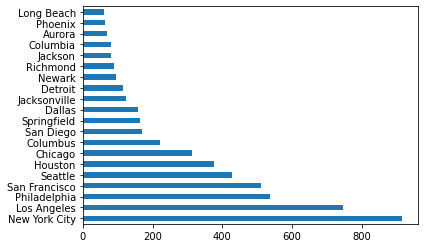

In [26]:
cities_by_counts[:20].plot(kind='barh')

<AxesSubplot:xlabel='City', ylabel='Count'>

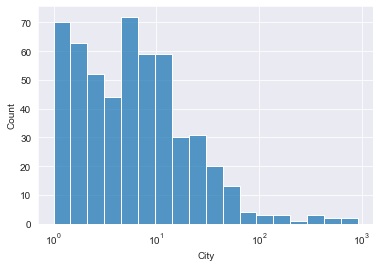

In [27]:
import seaborn as sns
sns.set_style("darkgrid")
sns.histplot(cities_by_counts, log_scale=True)

In [36]:
states=df['State'].unique()
states

array(['Kentucky', 'California', 'Florida', 'North Carolina',
       'Washington', 'Texas', 'Wisconsin', 'Utah', 'Nebraska',
       'Pennsylvania', 'Illinois', 'Minnesota', 'Michigan', 'Delaware',
       'Indiana', 'New York', 'Arizona', 'Virginia', 'Tennessee',
       'Alabama', 'South Carolina', 'Oregon', 'Colorado', 'Iowa', 'Ohio',
       'Missouri', 'Oklahoma', 'New Mexico', 'Louisiana', 'Connecticut',
       'New Jersey', 'Massachusetts', 'Georgia', 'Nevada', 'Rhode Island',
       'Mississippi', 'Arkansas', 'Montana', 'New Hampshire', 'Maryland',
       'District of Columbia', 'Kansas', 'Vermont', 'Maine',
       'South Dakota', 'Idaho', 'North Dakota', 'Wyoming',
       'West Virginia'], dtype=object)

In [37]:
len(states)

49

In [39]:
states_by_counts=df.State.value_counts()
states_by_counts

California              2001
New York                1128
Texas                    985
Pennsylvania             587
Washington               506
Illinois                 492
Ohio                     469
Florida                  383
Michigan                 255
North Carolina           249
Virginia                 224
Arizona                  224
Georgia                  184
Tennessee                183
Colorado                 182
Indiana                  149
Kentucky                 139
Massachusetts            135
New Jersey               130
Oregon                   124
Wisconsin                110
Maryland                 105
Delaware                  96
Minnesota                 89
Connecticut               82
Missouri                  66
Oklahoma                  66
Alabama                   61
Arkansas                  60
Rhode Island              56
Utah                      53
Mississippi               53
Louisiana                 42
South Carolina            42
Nevada        

In [42]:
states_by_counts[:20]

California        2001
New York          1128
Texas              985
Pennsylvania       587
Washington         506
Illinois           492
Ohio               469
Florida            383
Michigan           255
North Carolina     249
Virginia           224
Arizona            224
Georgia            184
Tennessee          183
Colorado           182
Indiana            149
Kentucky           139
Massachusetts      135
New Jersey         130
Oregon             124
Name: State, dtype: int64

<AxesSubplot:>

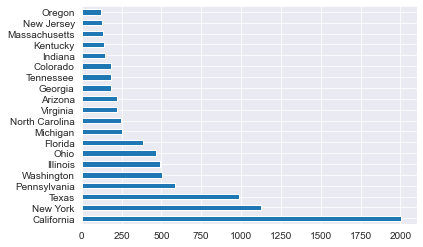

In [43]:
states_by_counts[:20].plot(kind='barh')

<AxesSubplot:xlabel='State', ylabel='Count'>

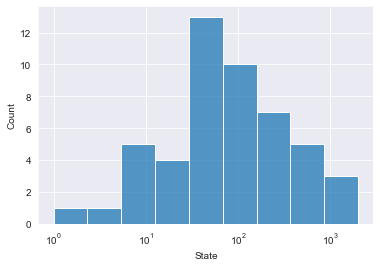

In [45]:
import seaborn as sns
sns.set_style("darkgrid")
sns.histplot(states_by_counts, log_scale=True)

In [46]:
df['Country'].unique()

array(['United States'], dtype=object)

In [51]:
df['Category'].unique()

array(['Furniture', 'Office Supplies', 'Technology'], dtype=object)

In [52]:
df['Category'].value_counts()

Office Supplies    6026
Furniture          2121
Technology         1847
Name: Category, dtype: int64

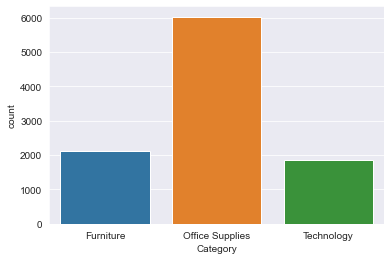

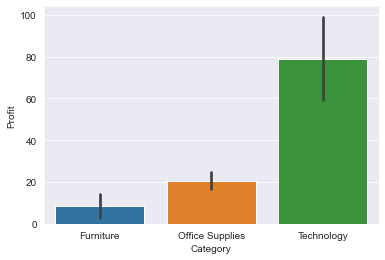

In [80]:
sns.countplot(x='Category',data=df)
plt.show()
sns.barplot(x='Category',y='Profit',data=df)
plt.show()

In [82]:
df['Ship Mode'].unique()

array(['Second Class', 'Standard Class', 'First Class', 'Same Day'],
      dtype=object)

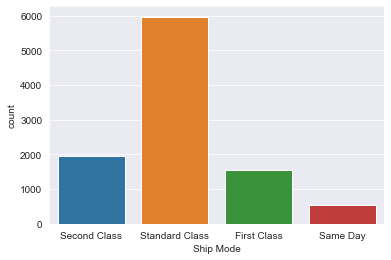

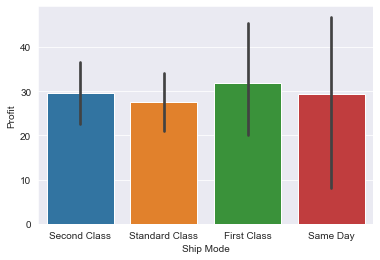

In [83]:
sns.countplot(x='Ship Mode',data=df)
plt.show()
sns.barplot(x='Ship Mode',y='Profit',data=df)
plt.show()

In [84]:
df['Segment'].unique()

array(['Consumer', 'Corporate', 'Home Office'], dtype=object)

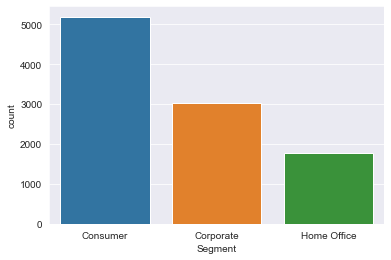

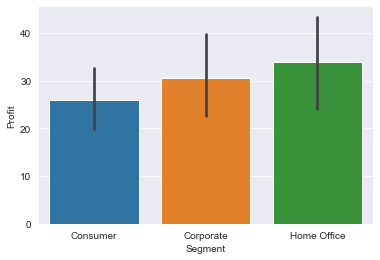

In [85]:
sns.countplot(x='Segment',data=df)
plt.show()
sns.barplot(x='Segment',y='Profit',data=df)
plt.show()

In [86]:
df['Region'].unique()

array(['South', 'West', 'Central', 'East'], dtype=object)

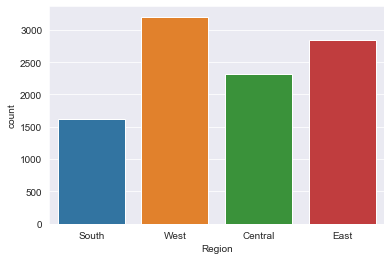

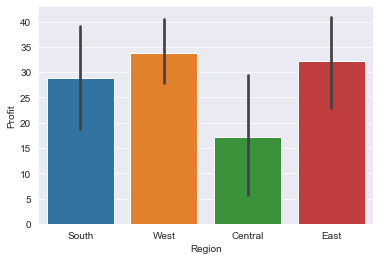

In [87]:
sns.countplot(x='Region',data=df)
plt.show()
sns.barplot(x='Region',y='Profit',data=df)
plt.show()

In [88]:
df['Sub-Category'].unique()

array(['Bookcases', 'Chairs', 'Labels', 'Tables', 'Storage',
       'Furnishings', 'Art', 'Phones', 'Binders', 'Appliances', 'Paper',
       'Accessories', 'Envelopes', 'Fasteners', 'Supplies', 'Machines',
       'Copiers'], dtype=object)

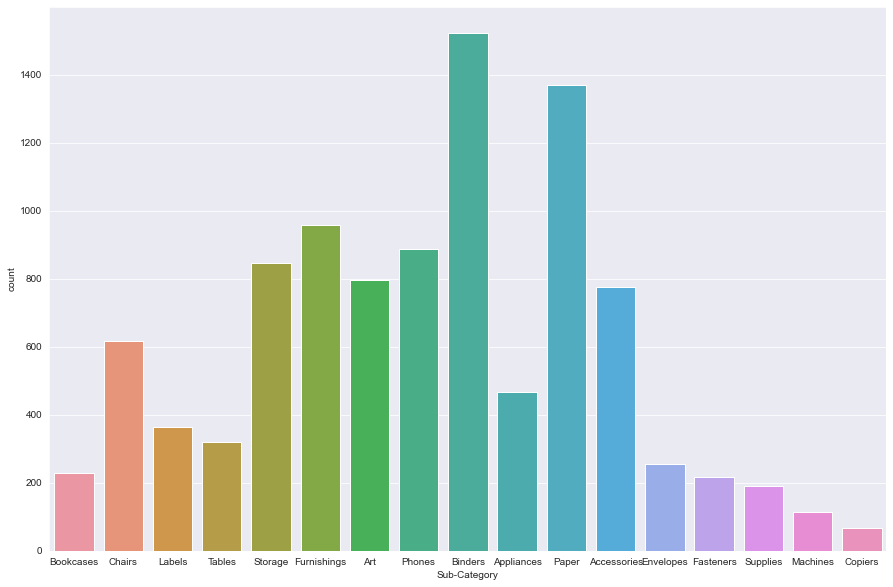

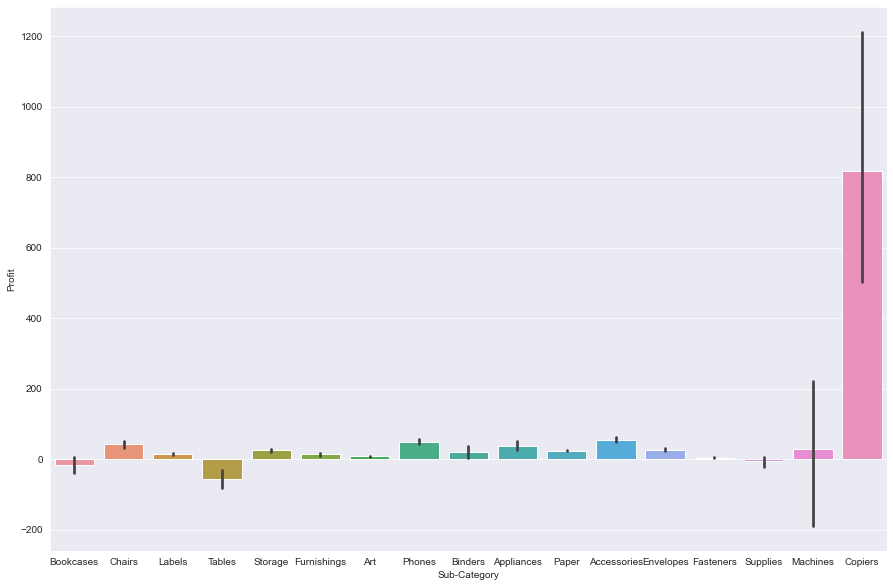

In [94]:
plt.figure(figsize=(15,10))
sns.countplot(x='Sub-Category',data=df)
plt.show()
plt.figure(figsize=(15,10))
sns.barplot(x='Sub-Category',y='Profit',data=df)
plt.show()

In [96]:
df['Quantity'].unique()

array([ 2,  3,  5,  7,  4,  6,  9,  1,  8, 14, 11, 13, 10, 12],
      dtype=int64)

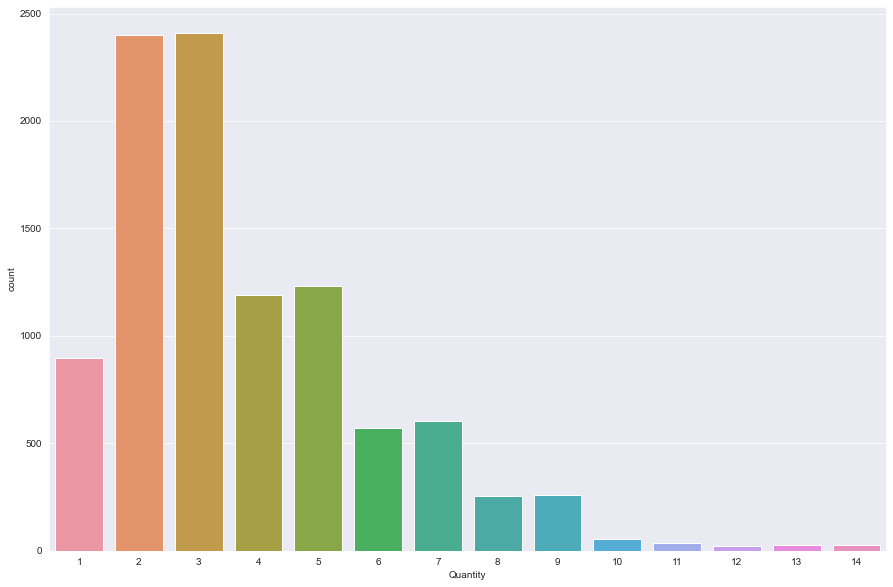

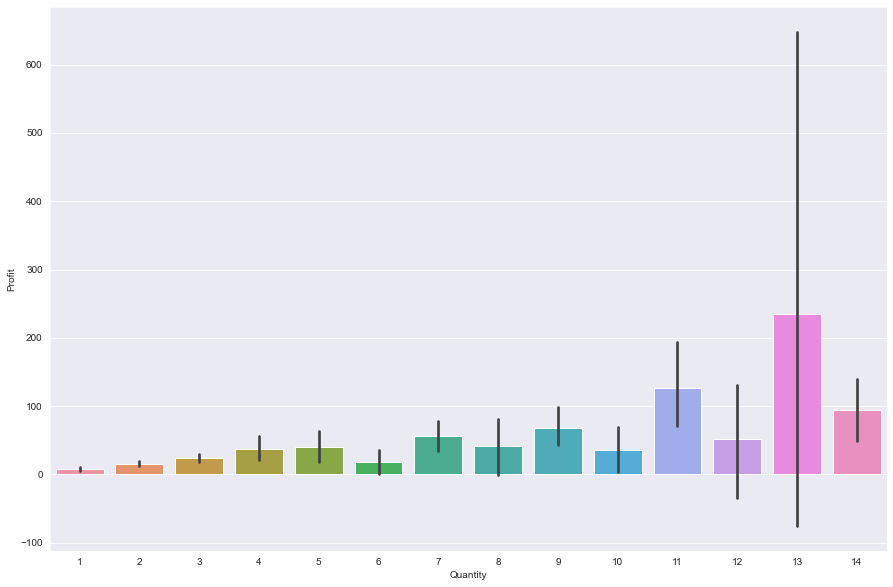

In [97]:
plt.figure(figsize=(15,10))
sns.countplot(x='Quantity',data=df)
plt.show()
plt.figure(figsize=(15,10))
sns.barplot(x='Quantity',y='Profit',data=df)
plt.show()

<AxesSubplot:xlabel='Quantity', ylabel='Profit'>

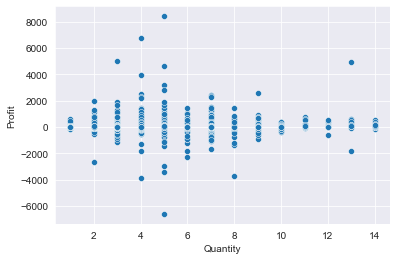

In [98]:
sns.scatterplot(x='Quantity', y='Profit',data=df)

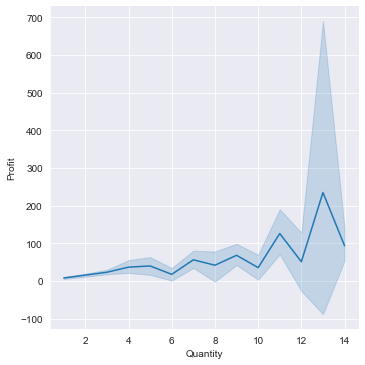

In [99]:
sns.relplot(x="Quantity",y="Profit",data=df,kind='line')

In [100]:
df['Discount'].unique()

array([0.  , 0.45, 0.2 , 0.8 , 0.3 , 0.5 , 0.7 , 0.6 , 0.32, 0.1 , 0.4 ,
       0.15])

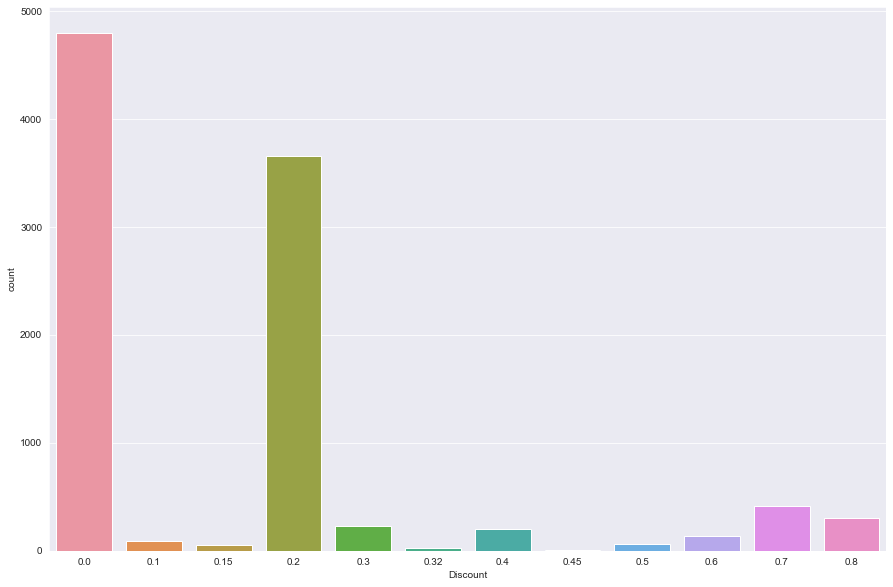

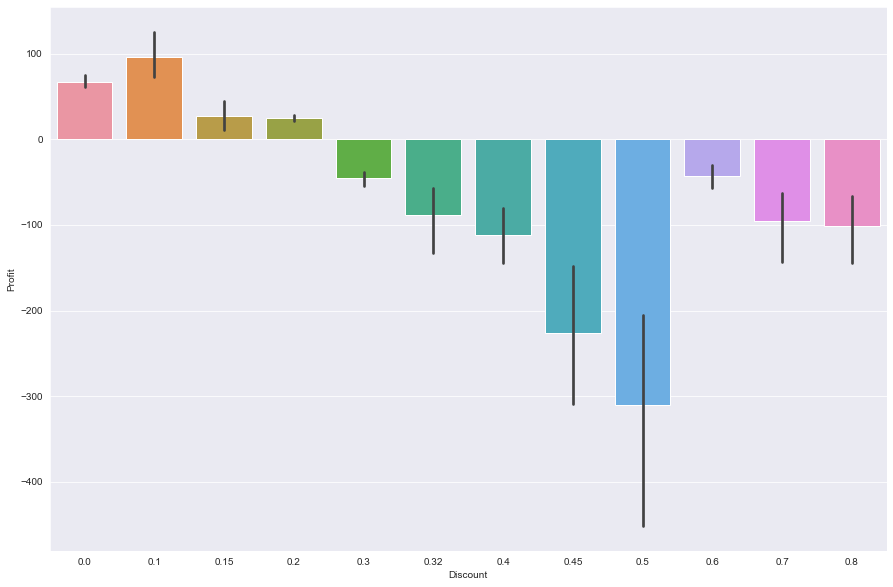

In [101]:
plt.figure(figsize=(15,10))
sns.countplot(x='Discount',data=df)
plt.show()
plt.figure(figsize=(15,10))
sns.barplot(x='Discount',y='Profit',data=df)
plt.show()

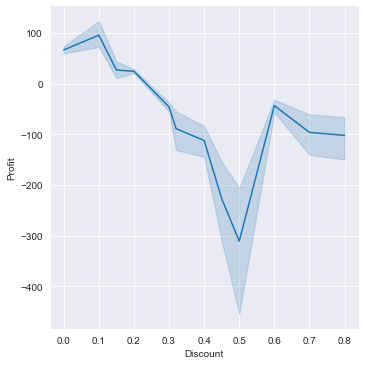

In [102]:
sns.relplot(x="Discount",y="Profit",data=df,kind='line')

c:\users\sk\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


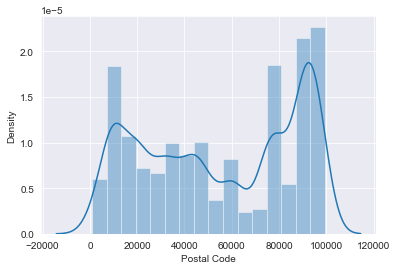

In [106]:
sns.distplot(df['Postal Code'])
plt.show()

In [108]:
df['Sales']

0       261.9600
1       731.9400
2        14.6200
3       957.5775
4        22.3680
          ...   
9989     25.2480
9990     91.9600
9991    258.5760
9992     29.6000
9993    243.1600
Name: Sales, Length: 9994, dtype: float64

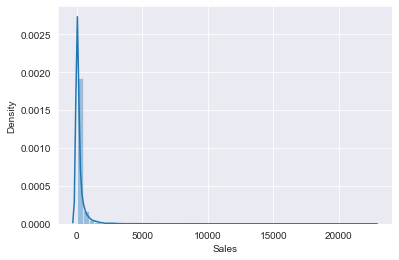

In [118]:
sns.distplot(df['Sales'])
plt.show()

<AxesSubplot:xlabel='Sales', ylabel='Profit'>

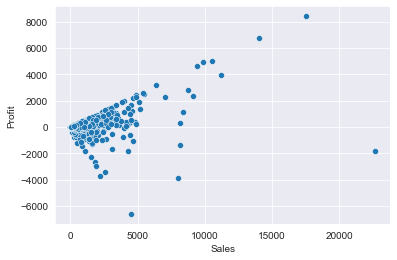

In [113]:
sns.scatterplot(x='Sales', y='Profit',data=df)

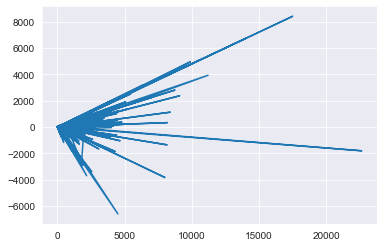

In [112]:
plt.plot(df["Sales"],df["Profit"])

In [125]:
df['status']=(df['Profit']>0)
df['status']=df['status'].replace([True,False],[1,0])
df['status']

0       1
1       1
2       1
3       0
4       1
       ..
9989    1
9990    1
9991    1
9992    1
9993    1
Name: status, Length: 9994, dtype: int64

In [127]:
x=pd.pivot_table(df,index='status',values=quant_features)
x

,Postal Code,Profit,Sales
status,,,
0,55915.980888,-80.646325,256.401860
1,55016.047779,54.917884,223.480623


In [130]:
non_num_features=[feature for feature in df.columns if df[feature].dtype=='O']
non_num_features

['Ship Mode',
 'Segment',
 'Country',
 'City',
 'State',
 'Region',
 'Category',
 'Sub-Category']

In [131]:
for feature in non_num_features:
    df=pd.get_dummies(df, columns = [feature],drop_first=True, prefix=feature)

In [133]:
df.shape

(9994, 610)

In [135]:
c_matrix=df.corr()
c_matrix['Profit'].sort_values(ascending=False)

Profit                  1.000000
Sales                   0.479064
Sub-Category_Copiers    0.278873
status                  0.228715
Category_Technology     0.101825
                          ...   
State_Pennsylvania     -0.058827
State_Ohio             -0.061425
Sub-Category_Tables    -0.065286
State_Texas            -0.077323
Discount               -0.219487
Name: Profit, Length: 610, dtype: float64